# CS 446 Final Notebook
# Comparative Analysis of Genetic Interaction Networks in *Caenorhabditis elegans* and *Drosophila melanogaster* from an Evolutionary Perspective
Team: Xenon

Member Name(s): Rachel Xing


# Abstract

This project aims to analyze and compare the genetic interaction networks in *Caenorhabditis elegans* and *Drosophila melanogaster*. Initially, it identifies genes with the highest degree centrality and betweenness centrality in two GI networks. Then, it examines the top three evolutionarily preferred three-vertex motifs with the highest frequencies present in both networks and those never present in each network. Through an evolutionary lens, the comparison of these network properties reveals similar patterns of genetic interactions, suggesting the presence of evolutionarily conserved molecular mechanisms in the two model organisms. This may provide insights into common molecular mechanisms shared among animals, contributing to our understanding of biological processes across species.

# Introduction

*C. elegans* and *D. melanogaster* are important model organisms in developmental and regenerative biology research, contributing to the understanding of human development and disease mechanisms. Despite the considerable morphological differences and evolutionary distance, both species exhibit evolutionary conserved molecular mechanisms like asymmetric cell division, cell migration, and axon pathfinding [1]. Previous studies have proven a degree of conservation present in developmental genetic mechanisms across different animal species [1]. Moreover, many development genes are involved in regenerative mechanisms in highly regenerative animals [2]. Thus, understanding the conservation between *C. elegans* and *D. melanogaster* can offer novel perspectives on fundamental developmental and regenerative processes in the animal kingdom.

With the development of computational biology, biologists have turned to exploring molecular interactions using statistical and computational methods. Analyzing genetic interaction (GI) networks has emerged as a highly effective approach, as it reveals diverse modes of gene interactions that denote varying functional connections [3]. Integrating these genetic interactions with molecular data allows for the identification of complex biochemical systems within organisms [3]. Hence, this study aims to compare key network properties (degree centrality, betweenness centrality, and three-vertex motifs) to uncover potential conserved patterns within the GI networks of *C. elegans* and *D. melanogaster*.

# Methods

###Description

**Datasets and Implementation**

The datasets utilized in this project are the genetic interaction datasets of C. elegans and D. melanogaster from The Alliance of Genome Resources [4]. The programming components were executed using Python on Google Colab, while data visualization was carried out using the PyPlot package from Matplotlib and the igraph library of Python.

**Characterization and Comparision of GI Networks**

***Degree and Betweenness Centrality***

Degree centrality is defined as the number of edges connected to a vertex in the network, while betweenness centrality is defined as the frequency at which nodes or edges occur along the shortest paths between any pair of nodes [5]. Both metrics serve as measures of a gene's centrality within the GI network. The computation of degree centrality and betweenness centrality for each gene in the GI network will be performed using the corresponding functions in the igraph library.

This study will identify genes with the highest centrality (both degree and betweenness) in the GI networks of *C. elegans* and *D. melanogaster*, indicating their importance in molecular mechanisms and potential involvement in evolutionarily conserved processes. The functions of these genes will be compared to reveal the potential evolutionary conservation of molecular mechanisms between these two model organisms.

Furthermore, the degree distributions of the two GI networks will be generated and fitted with the power-law fit using the corresponding function in the igraph library. This analysis aims to verify the importance of the identified genes in the GI networks. Additionally, plots of degree versus betweenness distributions will be generated to further validate the significance of the genes with the highest centrality in both networks.

***Three-vertex Motifs***

Genetic interaction networks are composed of regulatory patterns known as network motifs, each representing specific interactions between a defined number of genes performing information-processing functions [6]. Among the most studied motifs are three- and four-vertex motifs. The repeated selection of these motifs across various organisms may suggest evolutionary conservation or convergence, underscoring their fundamental role in biological functions [6].

This project will focus on studying three-vertex motifs, of which there are a total of 16 different classes based on unique combinations of directed interactions among three vertices. The goal is to identify and compare evolutionarily preferred three-vertex motifs between the GI networks of *C. elegans* and *D. melanogaster* to explore potential evolutionary conservation.

To do this, the frequencies of each class of three-vertex motifs in the GI network will be calculated first using the corresponding function in the igraph library. Then, 1,000 iterations will be conducted to generate random networks from the original network, and motif frequencies will be calculated for each iteration. The average and standard deviation of motif frequencies will then be used to perform one-sided z-tests, aiming to determine whether specific three-vertex motifs are evolutionarily preferred in the GI network (**Null hypothesis**: the frequency of a three-vertex motif in the original GI network, selected under evolutionary forces, is significantly higher than in the random GI network; significant factor set at 0.01).

Finally, the three most significant three-vertex motifs with the highest frequencies will be identified and compared between the GI networks of *C. elegans* and *D. melanogaster*.





### Programming

#### Initialization

Load Python packages used in this project

In [1]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
import cairo
!pip install python-igraph
import igraph, re, operator, scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
libgif-dev is already the newest version (5.1.9-2build2).
libjpeg-dev is already the newest version (8c-2ubuntu10).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


Load the dataset of *Caenorhabditis elegans* genetic interactions downloaded from the Alliance of Genome Resources

In [2]:
!curl https://fms.alliancegenome.org/download/INTERACTION-GEN_WB.tsv.gz --output INTERACTION-GEN_WB.tsv.gz
!gunzip -f INTERACTION-GEN_WB.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  294k    0  294k    0     0   799k      0 --:--:-- --:--:-- --:--:--  801k


Load the dataset of *Drosophila melanogaster* genetic interactions downloaded from the Alliance of Genome Resources

In [3]:
!curl https://fms.alliancegenome.org/download/INTERACTION-GEN_FB.tsv.gz --output INTERACTION-GEN_FB.tsv.gz
!gunzip -f INTERACTION-GEN_FB.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  565k    0  565k    0     0  1465k      0 --:--:-- --:--:-- --:--:-- 1468k


Define the functions will be used in the GI network characterization

In [4]:
def remove_duplicates(df: pd.DataFrame, name: str) -> pd.DataFrame:
  """
  Remove the duplicates from the given dataframe while printing the removal
  result.
  :param df: a pandas dataframe of the network
  :param name: the name of the dataframe
  :return: the pandas dataframe of the network after duplication removal
  """
  print(f"Number of interactions in {name} before duplicates removal:", len(df))
  df_nondup = df.drop_duplicates()
  print(f"Number of interactions in {name} after duplicates removal:", len(df_nondup))
  return df_nondup

In [5]:
def find_highest_degree_centrality(g: igraph.Graph) -> tuple:
  """
  Find the vertex with the highest degree centrality in the given network.
  If the network is directed, degree of vertex is calculated by the sum of
  indegree and outdegree.
  :param g: a igraph Graph object of the network
  :return: a tuple of (highest degree vertex, value of highest degree)
  """
  # calculate the degree of each vertex for the given network
  g_degrees = g.degree()
  # obtain the list of vertex names for the given network
  g_names = g.vs['name']
  # sort the list of vertex degrees (with names) in the descending order
  sorted_g_degrees_names = sorted(zip(g_names, g_degrees), key=operator.itemgetter(1), reverse=True)
  # return the tuple of vertex with highest degree centrality
  return sorted_g_degrees_names[0]

In [6]:
def power_law_fit_calculation(g: igraph.Graph) -> None:
  """
  Print the results of power law fit of the given graph.
  :param g: a igraph Graph object of the network
  :return: None
  """
  # perform power law fit to the graph's degree distribution
  g_alpha = igraph.statistics.power_law_fit(g.degree()).alpha
  # print the exponent alpha of the best-fit power-law
  print("%0.2f" % g_alpha)
  return None

In [7]:
def find_highest_betweenness_centrality(g: igraph.Graph, direct_bool=True) -> tuple:
  """
  Find the vertex with the highest betweenness centrality in the given network.
  :param g: a igraph Graph object of the network
  :param direct_bool: the Boolean value indating whether the network is directed
                      (default is true)
  :return: a tuple of (highest betweenness vertex, highest betweenness values)
  """
  # calculate normalized betweenness centrality of each vertex in the network
  normal_betweeness = normalize_betweenness_centrality(g, direct_bool)
  # sort the list of vertex betweenness centralities (with name) in descending order
  sorted_normal_betweeness = sorted(zip(g.vs['name'], normal_betweeness), key=operator.itemgetter(1), reverse=True)
  # return the tuple of vertex with highest betweenness centrality
  return sorted_normal_betweeness[0]

In [8]:
def normalize_betweenness_centrality(g: igraph.Graph, direct_bool=True) -> list:
  """
  Calculate the normalized betweenness centrality of each vertex in given network.
  :param g: a igraph Graph object of the network
  :param direct_bool: the Boolean value indating whether the network is directed
                      (default is true)
  :return: a list of normalized betweenness centrality for each vertex
  """
  # calculate the betweenness centrality of each vertex in the network
  betweeness_list = g.betweenness(directed=direct_bool)
  # normalize the betweenness centrality
  normal_betweeness_list= [i/(len(betweeness_list)**2) for i in betweeness_list]
  # return the normalized betweenness centrality
  return normal_betweeness_list

In [9]:
def motif_calculation(g: igraph.Graph, k: int) -> pd.Series:
  """
  Calculate the count of motifs with a given size k present in the given network
  while printing the motifs not present in the network
  :param g: a igraph Graph object of the network
  :param k: the size of the motifs
  :return: a pandas series storing storing motif counts in the network
  """
  # calculate the counts of all motifs with a size of k in the graph
  k_motifs = pd.Series(g.motifs_randesu(size=k))
  # identify the indice of the motifs not present in the network
  k_motifs.fillna(0, inplace=True)
  nan_k_motifs = k_motifs[k_motifs == 0]
  nan_k_motifs = nan_k_motifs.index.tolist()
  # print the result
  print(f'The {str(k)}-vertex motifs not present in the network are motifs:')
  for index in nan_k_motifs:
    print(f'"class {index}"', end = ' ')
  # return the resulting motif counts
  return k_motifs

In [10]:
def three_motifs_z_tests(g: igraph.Graph, three_motif_counts: pd.Series) -> np.array:
  """
  Perform 1000 loops of randomization for the original network and conduct
  z-score tests for whether each 3-motif is evolutionary preferred in the given
  GI networks
  :param g: a igraph Graph object of the network
  :param three_motif_counts: the counts for 3-motifs in the original network
  :return: an numpy array containing the one-sided p-value for each 3-motif from
           z-score tests
  """
  # create a dictionary to store counts of each 3-vertex motif from 10,000 random networks
  # there are a total number of 16 different kinds of 3-vertex motifs
  three_motif_random_1000 = {class_key:[] for class_key in range(0, 16)}

  # perform 10,000 loops to get counts for 3-vertex motifs from 10,000 random networks
  rewired_g = g.copy() # keep the original network from being changed
  for n in range(0, 1000):
    # make randomized network while preserving the degree distribution
    rewired_g.rewire(n=1000, mode='simple')
    random_three_motif = rewired_g.motifs_randesu(size=3)
    for i in range(0, len(random_three_motif)):
      three_motif_random_1000[i].append(random_three_motif[i])

  # compute and print mean and standard deviation of counts of each motif in 10,000 random networks
  random_count_1000_mean = np.array([np.mean(three_motif_random_1000[i]) for i in range(0, 16)])
  random_count_1000_sd = np.array([np.std(three_motif_random_1000[i]) for i in range(0, 16)])
  print("The mean frequencies of 3-vertex motif in 1,000 randomized networks:")
  print(random_count_1000_mean)
  print("The standard deviation of 3-vertex motif in 1,000 randomized networks:")
  print(random_count_1000_sd)

  # compute the z-scores by the vector element-wise division operation
  # z = (x-μ)/σ, where x is observed value, μ is the sample mean, and σ is sd of the sample
  three_motif_z_scores = (np.array(three_motif_counts)-random_count_1000_mean)/random_count_1000_sd
  # compute and print the one-sided p-values by the vector element-wise division operation
  three_motif_p_vals = scipy.stats.norm.sf(three_motif_z_scores)/float(2)

  return three_motif_p_vals

In [11]:
def top_freq_sig_three_motifs(origin_motif_counts: pd.Series, z_results: np.array) -> None:
  """
  Identify the top three significant 3-motifs (p-value < 0.01) with highest
  frequencies in the original network.
  :param origin_motif_counts: motif counts for the original network
  :param z_results: z-test results (one sided p-values) for the motif counts
                    between original and randomized networks
  :return: None
  """
  # figure out the top three significant 3-motifs with p-value < 0.01 from
  # one-sided z-test
  three_motif_sig = origin_motif_counts[np.where(z_results<0.01)[0]]
  top_three_motif = three_motif_sig.nlargest(3)

  # print the result
  print('The most frequent evolutionary preferred 3-motifs in the network are motifs:')
  for index in top_three_motif.index:
    if z_results[index] > 0.0001:
      print(f'"class {index}" with a count of {top_three_motif[index]} and a p-value of {z_results[index]: 0.4f}')
    else:
      print(f'"class {index}" with a count of {top_three_motif[index]} and a p-value < 0.0001')

#### Genetic Interaction (GI) Network Characterization for *C. elegan*

Convert the GI network of *C. elegan* into the edge list and remove duplicates.

In [12]:
roundworm_gi = []  # edge list storing the GI network of C. elegan
line_ctr = 0       # counter for line

# open the tsv file of C. elegan GI network
with open("INTERACTION-GEN_WB.tsv") as f:
  # Read the file line by line
  for line in f:
    # strip the newline at the end of line
    line.rstrip('\n')
    # skip the first 14 lines which contains dataset description
    if line_ctr > 14:
      line_list = line.split()
      genes_interact = []   # initialize a list for directed interaction of genes A -> B
      # split the line into elements by columns and extract the names of
      # gene interactor A and gene interactor B
      for element in line_list:
        if 'wormbase:' in element and 'public_name' in element:
          element = element.split("|")[0]
          genes_interact.append(element.replace('wormbase:','').replace('(public_name)',''))
      # append the list to the edge list if there are two interacting genes
      if len(genes_interact) == 2:
        roundworm_gi.append(genes_interact)
    # increment the line counter at the end of each
    line_ctr += 1

In [13]:
# read the edge list of C. elegan network into dataframe without duplicate rows
roundworm_gi_df = pd.DataFrame(roundworm_gi, columns=['source', 'target'])
roundworm_gi_df = remove_duplicates(roundworm_gi_df, "C. elegan GI network")

Number of interactions in C. elegan GI network before duplicates removal: 10666
Number of interactions in C. elegan GI network after duplicates removal: 7016


Construct a igraph Graph for the network from the edge list

In [14]:
roundworm_gi_g = igraph.Graph.TupleList(roundworm_gi_df.values.tolist(), directed=True)
roundworm_gi_g.summary()

'IGRAPH DN-- 2695 7016 -- \n+ attr: name (v)'

Determine the gene with the highest vertex degree in the network, where degree of vertex is calculated by the sum of indegree and outdegree.

In [15]:
roundworm_gene_top_degree = find_highest_degree_centrality(roundworm_gi_g)
print("The gene with highest degree centrality in C. elegan GI network is", roundworm_gene_top_degree[0], 'with a degree of', str(roundworm_gene_top_degree[1]))

The gene with highest degree centrality in C. elegan GI network is daf-2 with a degree of 411


Draw the degree distribution of the network and perform power-law fit

Text(0, 0.5, 'N(k)')

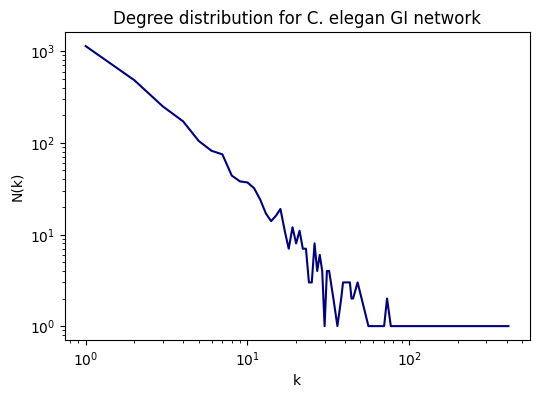

In [16]:
roundworm_gi_hist = roundworm_gi_g.degree_distribution().bins()
xs = list()
ys = list()
plt.figure(figsize = (6, 4))
for i in roundworm_gi_hist:
  if i[2] > 0:  # remove bin counts of zero
    xs.append(i[0])
    ys.append(i[2])
plt.loglog(xs, ys, 'navy')
plt.title('Degree distribution for C. elegan GI network')
plt.xlabel('k')
plt.ylabel('N(k)')

Obtain the exponent alpha of the best-fit power-law to the degree distribution

In [17]:
power_law_fit_calculation(roundworm_gi_g)

2.54


Calculate and plot the scatter plot of betweenness centrality vs. vertex degree for all genes, on log-log scale (normalize your betweenness centrality values by dividing by M^2 where M is the number of metabolites)

In [18]:
roundworm_gene_top_betweenness = find_highest_betweenness_centrality(roundworm_gi_g)
print("The gene with highest betweenness centrality in C. elegan GI network is", roundworm_gene_top_betweenness[0], 'with a normalized betweenness of', str(roundworm_gene_top_betweenness[1]))

The gene with highest betweenness centrality in C. elegan GI network is daf-2 with a normalized betweenness of 0.09568641414122855


Text(340, 0.022, 'daf-2')

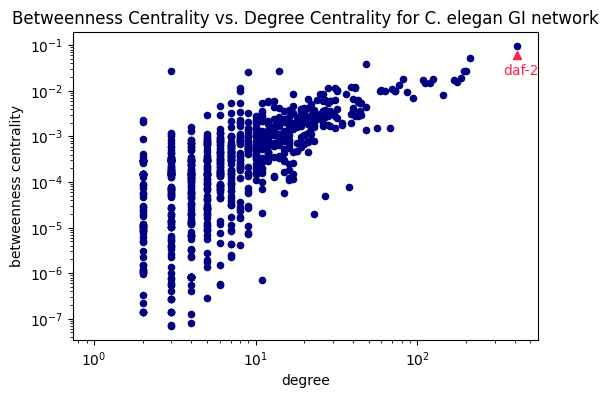

In [19]:
# plot the scatterplot of betweenness centrality vs. vertex degree for all genes
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.scatter(roundworm_gi_g.degree(), normalize_betweenness_centrality(roundworm_gi_g), color='navy', marker='o', s=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Betweenness Centrality vs. Degree Centrality for C. elegan GI network')
ax.set_xlabel('degree')
ax.set_ylabel('betweenness centrality')
plt.plot(411, 0.0600, "-^", color='#FF204E')
plt.text(340, 0.0220, 'daf-2', color='#FF204E')

Calculate the frequencies of three-vertex motifs in the original network

In [20]:
np.set_printoptions(precision=None, suppress=True)
roundworm_three_motifs = motif_calculation(roundworm_gi_g, 3)
print(f"\nThe frequencies of 3-vertex motif in original C. elegan GI network:\n{np.array(roundworm_three_motifs)}")

The 3-vertex motifs not present in the network are motifs:
"class 0" "class 1" "class 3" 
The frequencies of 3-vertex motif in original C. elegan GI network:
[     0.      0.  24695.      0.  62677.   4964. 171999.   3262.    304.
  17469.    753.    112.    374.    610.    206.     15.]


Perform randomization of the network and one-sided z-test to identify the evolutionary preferred three-vertex motifs with highest frequencies in the network

In [21]:
roundworm_three_motif_z_test_results = three_motifs_z_tests(roundworm_gi_g, roundworm_three_motifs)
print("The p-value of one-sided z-test for each motif: ")
roundworm_three_motif_z_test_results

The mean frequencies of 3-vertex motif in 1,000 randomized networks:
[       nan        nan  29213.311        nan  74711.279   2908.931
 180399.066   2530.189    109.954  11639.642    224.936    218.17
    192.139    308.488     56.846      3.802]
The standard deviation of 3-vertex motif in 1,000 randomized networks:
[          nan           nan  385.05419135           nan 1671.95264381
  299.27873336 1355.26799108  130.91813197   18.83714108 1247.92389024
   54.67286259   22.12995933   27.13115698   55.51313228   15.671129
    2.64249806]
The p-value of one-sided z-test for each motif: 


array([       nan,        nan, 0.5       ,        nan, 0.5       ,
       0.        , 0.5       , 0.00000001, 0.        , 0.00000075,
       0.        , 0.4999996 , 0.        , 0.00000001, 0.        ,
       0.00000565])

#### Genetic Interaction (GI) Network Characterization for *D. melanogaster*

Convert the GI network of *D. melanogaster* into the edge list and remove duplicates

In [22]:
fruitfly_gi = []  # edge list storing the GI network of C. elegan
line_ctr = 0       # counter for line

# open the tsv file of C. elegan GI network
with open("INTERACTION-GEN_FB.tsv") as f:
  # Read the file line by line
  for line in f:
    # strip the newline at the end of line
    line.rstrip('\n')
    # skip the first 14 lines which contains dataset description
    if line_ctr > 14:
      line_list = line.split('\t')
      genes_interact = []   # initialize a list for directed interaction of genes A -> B
      # split the line into elements by columns and extract the names of
      # gene interactor A and gene interactor B
      for element in line_list:
        if 'flybase:' in element and '(gene name)' in element:
          genes_interact.append(element.replace('flybase:','').replace('(gene name)',''))
      # append the list to the edge list if there are two interacting genes
      if len(genes_interact) == 2:
        fruitfly_gi.append(genes_interact)
    # increment the line counter at the end of each
    line_ctr += 1

In [23]:
# read the edge list of D. melanogaster network into dataframe without duplicate rows
fruitfly_gi_df = pd.DataFrame(fruitfly_gi, columns=['source', 'target'])
fruitfly_gi_df = remove_duplicates(fruitfly_gi_df, "D. melanogaster GI network")

Number of interactions in D. melanogaster GI network before duplicates removal: 18275
Number of interactions in D. melanogaster GI network after duplicates removal: 14872


Construct a igraph Graph for the network from the edge list

In [24]:
fruitfly_gi_g = igraph.Graph.TupleList(fruitfly_gi_df.values.tolist(), directed=True)
fruitfly_gi_g.summary()

'IGRAPH DN-- 4533 14872 -- \n+ attr: name (v)'

Determine the gene with the highest vertex degree in the network, where degree of vertex is calculated by the sum of indegree and outdegree.

In [25]:
fruitfly_gene_top_degree = find_highest_degree_centrality(fruitfly_gi_g)
print("The gene with highest degree centrality in D. melanogaster GI network is", fruitfly_gene_top_degree[0], 'with a degree of', str(fruitfly_gene_top_degree[1]))

The gene with highest degree centrality in D. melanogaster GI network is N with a degree of 365


Draw the degree distribution of the network and perform power-law fit

Text(0, 0.5, 'N(k)')

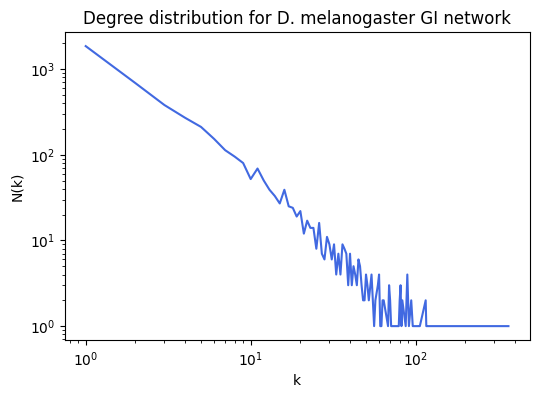

In [26]:
import matplotlib.pyplot as plt
fruitfly_gi_hist = fruitfly_gi_g.degree_distribution().bins()
xs = list()
ys = list()
plt.figure(figsize = (6, 4))
for i in fruitfly_gi_hist:
  if i[2] > 0:  # remove bin counts of zero
    xs.append(i[0])
    ys.append(i[2])
plt.loglog(xs, ys, 'royalblue')
plt.title('Degree distribution for D. melanogaster GI network')
plt.xlabel('k')
plt.ylabel('N(k)')

Obtain the exponent alpha of the best-fit power-law to the degree distribution


In [27]:
power_law_fit_calculation(fruitfly_gi_g)

2.33


Calculate and plot the scatter plot of betweenness centrality vs. vertex degree for all genes, on log-log scale (normalize your betweenness centrality values by dividing by M^2 where M is the number of metabolites)

In [28]:
fruitfly_gene_top_betweenness = find_highest_betweenness_centrality(fruitfly_gi_g)
print("The gene with highest betweenness centrality in D. melanogaster GI network is", fruitfly_gene_top_betweenness[0], 'with a normalized betweenness of', str(fruitfly_gene_top_betweenness[1]))

The gene with highest betweenness centrality in D. melanogaster GI network is N with a normalized betweenness of 0.058641920133866855


Text(345, 0.015, 'N')

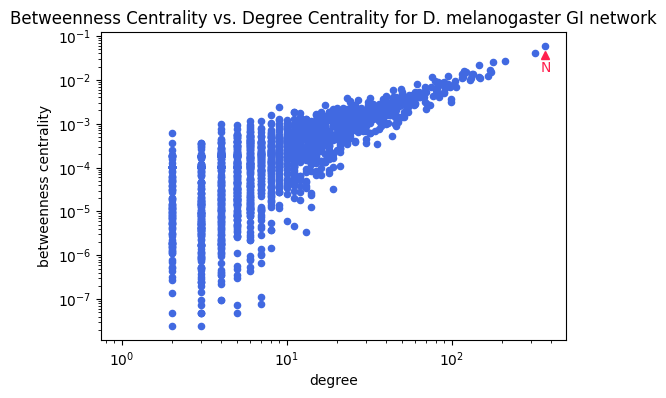

In [29]:
# plot the scatterplot of betweenness centrality vs. vertex degree for all genes
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.scatter(fruitfly_gi_g.degree(), normalize_betweenness_centrality(fruitfly_gi_g), color='royalblue', marker='o', s=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Betweenness Centrality vs. Degree Centrality for D. melanogaster GI network')
ax.set_xlabel('degree')
ax.set_ylabel('betweenness centrality')
plt.plot(365, 0.0370, "-^", color='#FF204E')
plt.text(345, 0.0150, 'N', color='#FF204E')

Calculate the frequencies of three-vertex motifs in the original network

In [30]:
fruitfly_three_motifs = motif_calculation(fruitfly_gi_g, 3)
print(f"\nThe frequencies of 3-vertex motif in original D. melanogaster GI network:\n{np.array(fruitfly_three_motifs)}")

The 3-vertex motifs not present in the network are motifs:
"class 0" "class 1" "class 3" 
The frequencies of 3-vertex motif in original D. melanogaster GI network:
[     0.      0.  58984.      0. 118768.  33216. 189129.   4395.   1350.
  61234.   7986.    327.    970.   1637.   1165.    257.]


Perform randomization of the network and one-sided z-test to identify the evolutionary preferred three-vertex motifs with highest frequencies in the network

In [31]:
fruitfly_three_motif_z_test_results = three_motifs_z_tests(fruitfly_gi_g, fruitfly_three_motifs)
print("The p-value of one-sided z-test for each motif: ")
fruitfly_three_motif_z_test_results

The mean frequencies of 3-vertex motif in 1,000 randomized networks:
[       nan        nan  97246.668        nan 215945.286   8752.093
 247546.327   5132.199    249.284  16813.25     456.234    784.955
    385.053    338.468     83.938      3.947]
The standard deviation of 3-vertex motif in 1,000 randomized networks:
[          nan           nan 1770.80621858           nan 4623.39181188
 1387.13026294 2807.22533831  187.00449032   46.11049061 2429.65118885
  243.77062835   47.8805908    50.70566232   53.47531184   36.87481737
    4.8604723 ]
The p-value of one-sided z-test for each motif: 


array([       nan,        nan, 0.5       ,        nan, 0.5       ,
       0.        , 0.5       , 0.49997981, 0.        , 0.        ,
       0.        , 0.5       , 0.        , 0.        , 0.        ,
       0.        ])

# Results

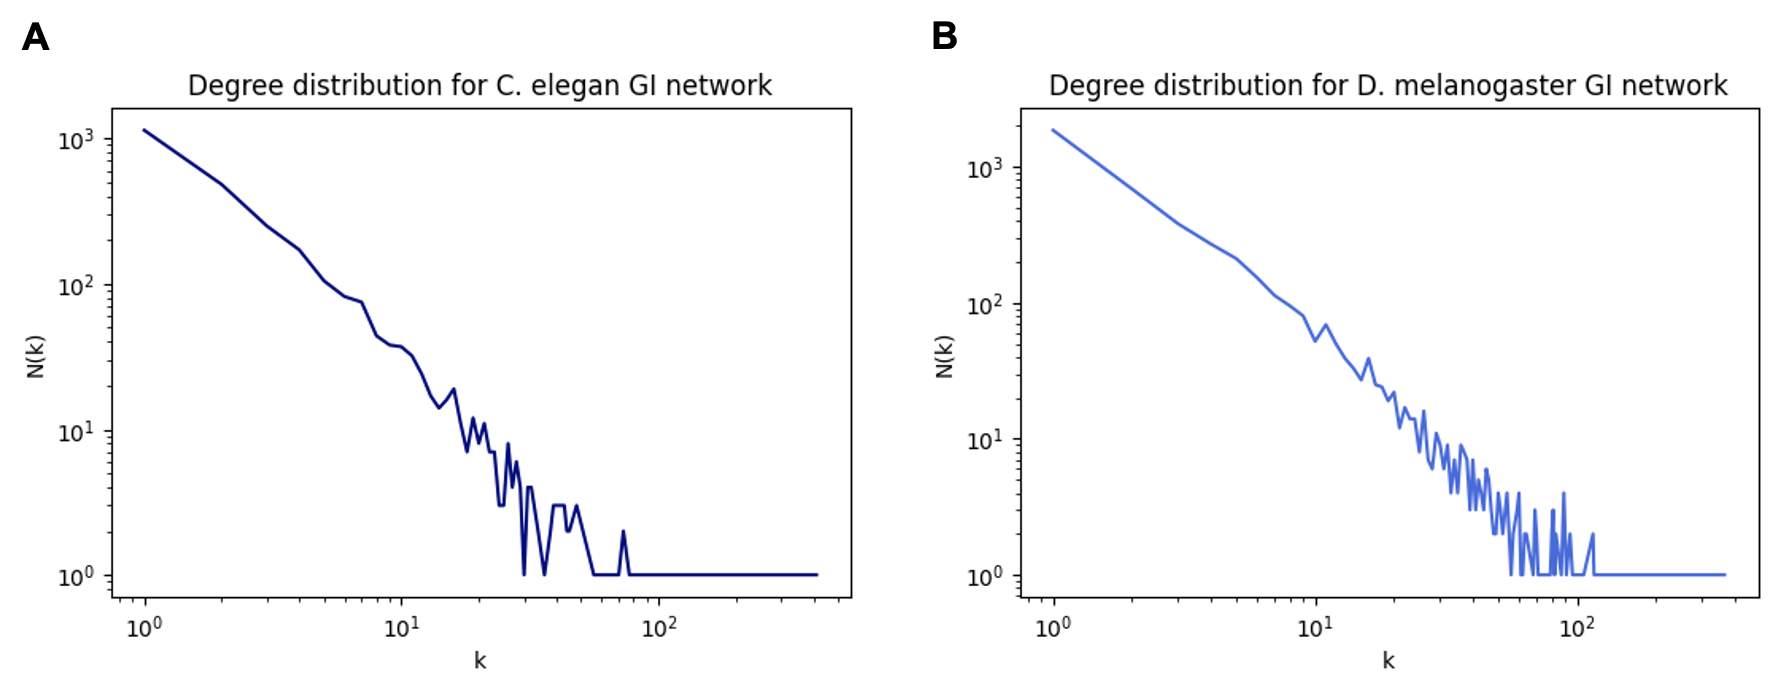

**Figure 1**. The distributions of degree centralities for GI networks on the log-log scale. The x-axis represents the number of vertices, while the y-axis shows the corresponding degree centralities of the vertices. (A) The distribution for *C. elegan* with the exponent of the best-fit power law alpha = 2.54 (B) The distribution for *D. melanogaster* with the exponent of the best-fit power law alpha = 2.33

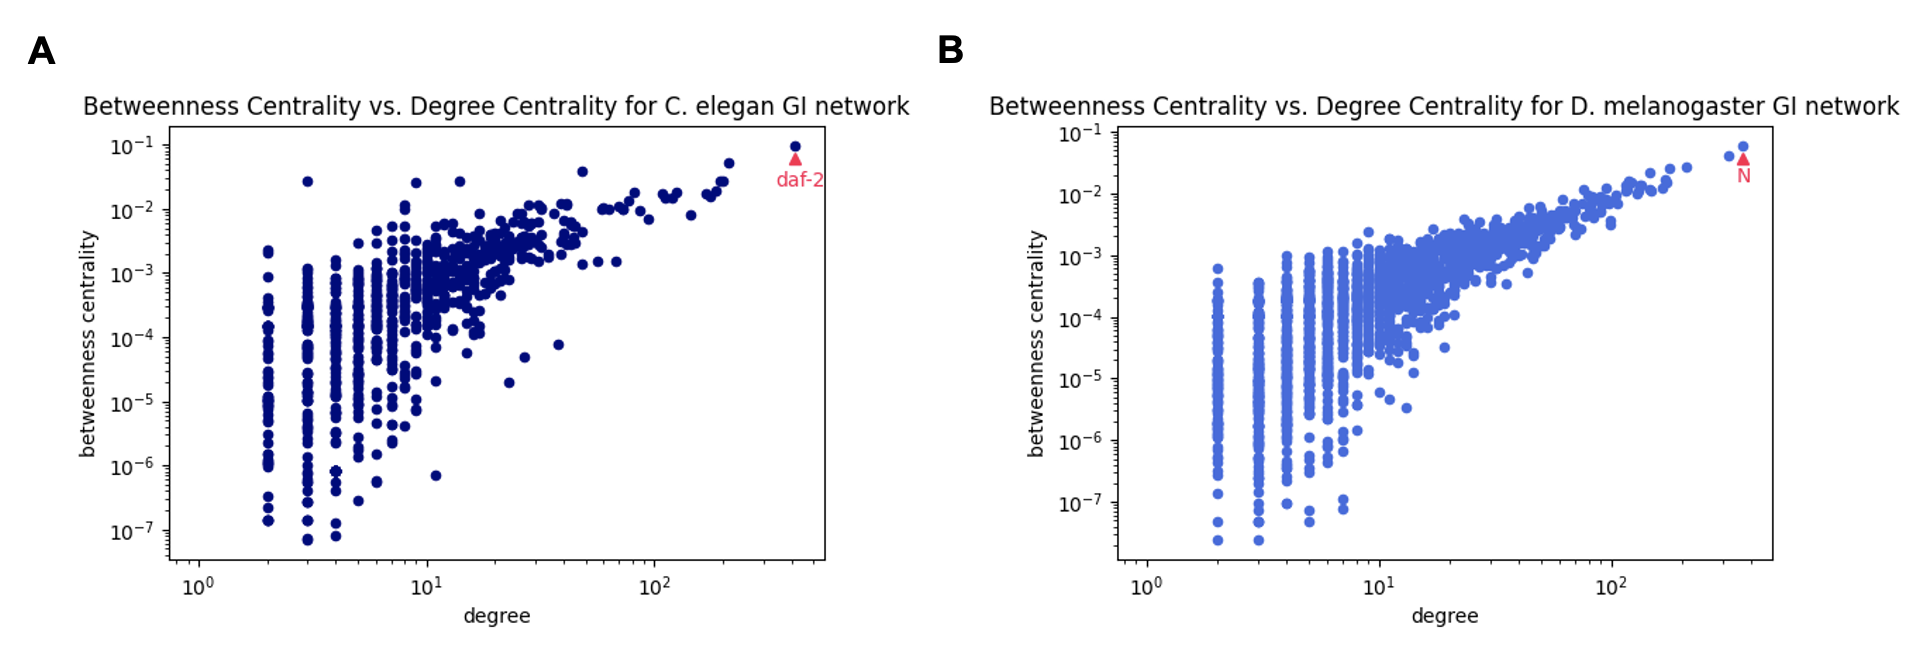

**Figure 2**. The plots of betweenness vs. degree centralities distributions on the log-log scale in the GI networks, where the x-axis represents the degree of vertices and the y-axis represents their betweenness. (A) The plot for *C. elegan* with a red arrow indicating the gene daf-2 exhibiting the highest centrality (degree centrality = 411 and normalized betweenness centrality = 0.0957) (B) The plot for *D. melanogaster* with the red arrow indicating the gene N (Notch) exhibiting the highest centrality (degree centrality = 365 and normalized betweenness centrality = 0.0586)

In [32]:
top_freq_sig_three_motifs(roundworm_three_motifs, roundworm_three_motif_z_test_results)

The most frequent evolutionary preferred 3-motifs in the network are motifs:
"class 9" with a count of 17469.0 and a p-value < 0.0001
"class 5" with a count of 4964.0 and a p-value < 0.0001
"class 7" with a count of 3262.0 and a p-value < 0.0001


In [33]:
top_freq_sig_three_motifs(fruitfly_three_motifs, fruitfly_three_motif_z_test_results)

The most frequent evolutionary preferred 3-motifs in the network are motifs:
"class 9" with a count of 61234.0 and a p-value < 0.0001
"class 5" with a count of 33216.0 and a p-value < 0.0001
"class 10" with a count of 7986.0 and a p-value < 0.0001


# Conclusion

The gene with the highest centrality in the *C. elegan* GI network is daf-2, and that in the *D. melanogaster* GI network is the N (Notch) gene (Figure 2). Daf-2, encoding the only insulin-like growth factor receptor in *C. elegans*, serves as a critical regulator in embryonic development and several physiological pathways [7]. The N (Notch) gene encodes a cell signaling protein crucial for neuronal and epidermal determination in Drosophila embryos [8]. Both genes are important for embryonic development. Additionally, the degree distributions of both GI networks exhibit similar best-fit power-law exponents, indicating similar patterns of centralities (Figure 1). These combined findings suggest the presence of conserved molecular mechanisms associated with development between two model organisms.

The three-vertex motif analysis indicates that both networks lack class #0, class #1, and class #3 motifs. In the C. elegan GI network, class #9, class #5, and class #7 are the most frequent evolutionary preferred motifs (all with a one-sided p-value < 0.0001). Similarly, in the D. melanogaster GI network, class #9, class #5, and class #10 are the most frequent evolutionary preferred motifs (all with a one-sided p-value < 0.0001). Both networks share class #9 (Figure 3) and class #5 (Figure 4) as frequently occurring evolutionary preferred motifs, suggesting these two patterns of genetic interaction are highly conserved.

Overall, the results demonstrate conserved patterns in genetic interactions between *C. elegan* and *D. melanogaster*. The further analysis of developmental mechanisms within the genetic pathways involving daf-2 and the N (Notch) gene, as well as genetic interactions related to development or regeneration with patterns like class #9 and class #5 three-vertex motifs, has the great potential to uncover conserved molecular mechanisms between these two organisms. Thus, it can offer insights into shared molecular mechanisms across all animals, contributing to research in development and regeneration.


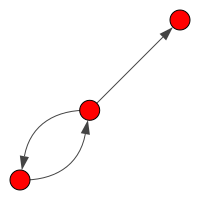

In [34]:
three_motif_class_9 = igraph.Graph.Isoclass(3, 9, directed=True)
igraph.drawing.plot(three_motif_class_9, bbox = [0,0,200,200])

**Figure 3**. The graph of three-vertex motifs #9

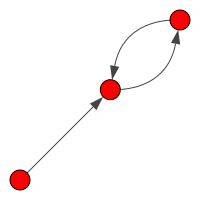

In [35]:
three_motif_class_5 = igraph.Graph.Isoclass(3, 5, directed=True)
igraph.drawing.plot(three_motif_class_5, bbox = [0,0,200,200])

**Figure 4**. The graph of three-vertex motifs #5

# References

[1] J. J. Li, H. Huang, P. J. Bickel, and S. E. Brenner, “Comparison of D. melanogaster and C. elegans developmental stages, tissues, and cells by modENCODE RNA-seq data,” Genome Res, vol. 24, no. 7, pp. 1086–1101, Jul. 2014, doi: 10.1101/gr.170100.113.

[2] N. Suzuki and H. Ochi, “Regeneration enhancers: A clue to reactivation of developmental genes,” Dev Growth Differ, vol. 62, no. 5, pp. 343–354, Jun. 2020, doi: 10.1111/dgd.12654.

[3] R. J. Taylor, A. F. Siegel, and T. Galitski, “Network motif analysis of a multi-mode genetic-interaction network,” Genome Biol, vol. 8, no. 8, p. R160, 2007, doi: 10.1186/gb-2007-8-8-r160.

[4] C. J. Bult and P. W. Sternberg, “The alliance of genome resources: transforming comparative genomics,” Mamm Genome, vol. 34, no. 4, pp. 531–544, Dec. 2023, doi: 10.1007/s00335-023-10015-2.

[5] K. C. Gunsalus and K. Rhrissorrakrai, “Networks in Caenorhabditis elegans,” Current Opinion in Genetics & Development, vol. 21, no. 6, pp. 787–798, Dec. 2011, doi: 10.1016/j.gde.2011.10.003.

[6] U. Alon, “Network motifs: theory and experimental approaches,” Nat Rev Genet, vol. 8, no. 6, pp. 450–461, Jun. 2007, doi: 10.1038/nrg2102.

[7] A. Suresh and B. Wightman, “The daf-2 insulin receptor functions in C. elegans embryo elongation,” MicroPubl Biol, vol. 2020, p. 10.17912/micropub.biology.000117, doi: 10.17912/micropub.biology.000117.

[8] R. Baker and G. Schubiger, “Autonomous and nonautonomous Notch functions for embryonic muscle and epidermis development in Drosophila,” Development, vol. 122, no. 2, pp. 617–626, Feb. 1996, doi: 10.1242/dev.122.2.617.



# Acknowledgements

Thanks for the codes and methods from the course materials by Professor Stephen Ramsey!

